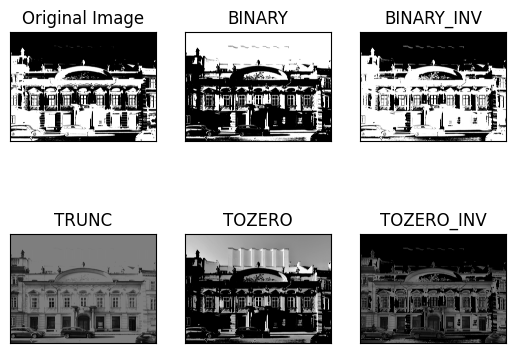

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('pic_1.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret,thresh1 = cv.threshold(gray,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [thresh, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


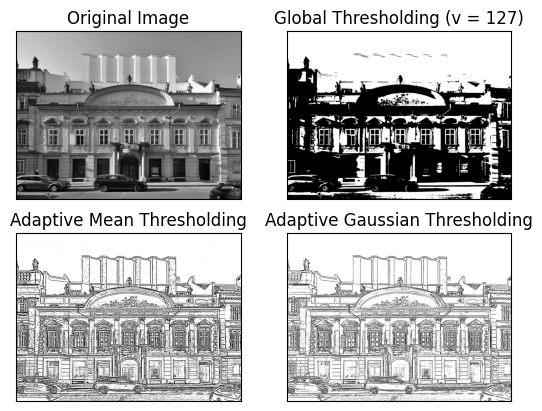

In [27]:
img = cv.imread('pic_1.jpg', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

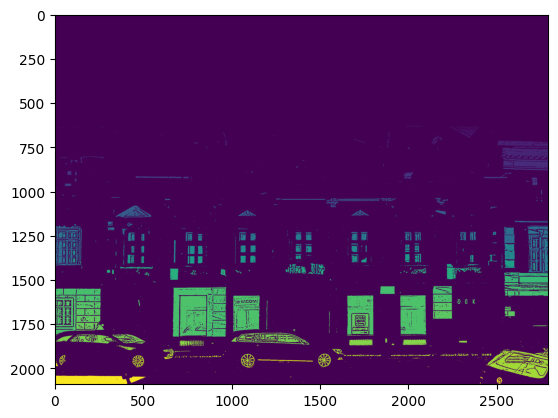

In [30]:
# Marker labelling
ret, markers = cv.connectedComponents(th3)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
##markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_65572\4237822384.py:23: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(edges)


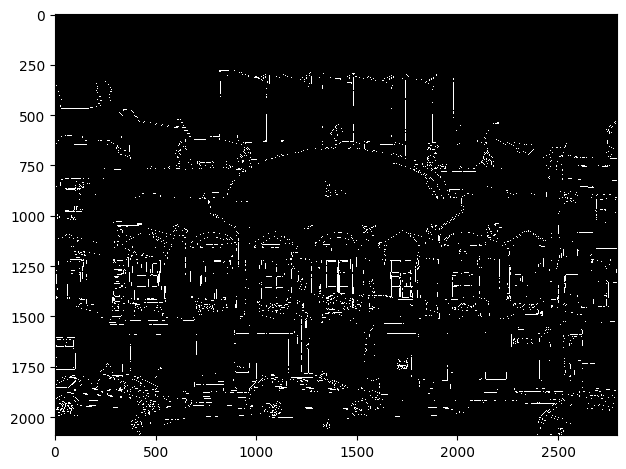

In [9]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage.feature
import numpy as np
from pandas import DataFrame


# С помощью сanny edge detector находим края
filename = 'pic_1.jpg'
sigma = 1.50            # Настраиваем параметры, пока
low_threshold = 0.0     # не удовлетримся результатом
high_threshold = 110.0  #
image = iio.imread(uri=filename, mode="L")

edges = skimage.feature.canny(
    image=image,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)

# Выводим результат
skimage.io.imshow(edges)
plt.show()